In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet

In [48]:
avocado_df = pd.read_csv('avocado.csv')
avocado_df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [49]:
avocado_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [50]:
avocado_df.isna().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [51]:
avocado_df.duplicated().sum()

0

In [52]:
avocado_df = avocado_df.sort_values('Date')
avocado_df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
9593,51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
10009,51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
1819,51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
9333,51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise


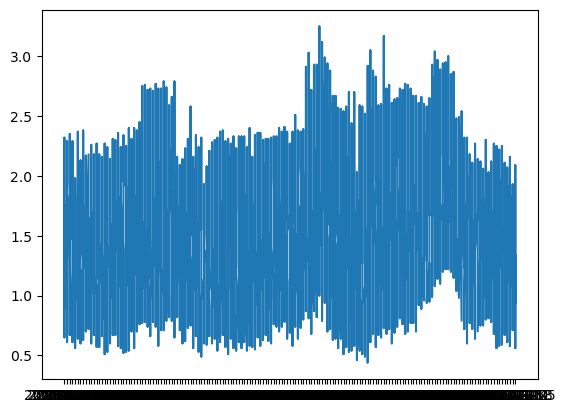

In [53]:
 plt.plot(avocado_df['Date'], avocado_df['AveragePrice'])

<AxesSubplot:xlabel='region'>

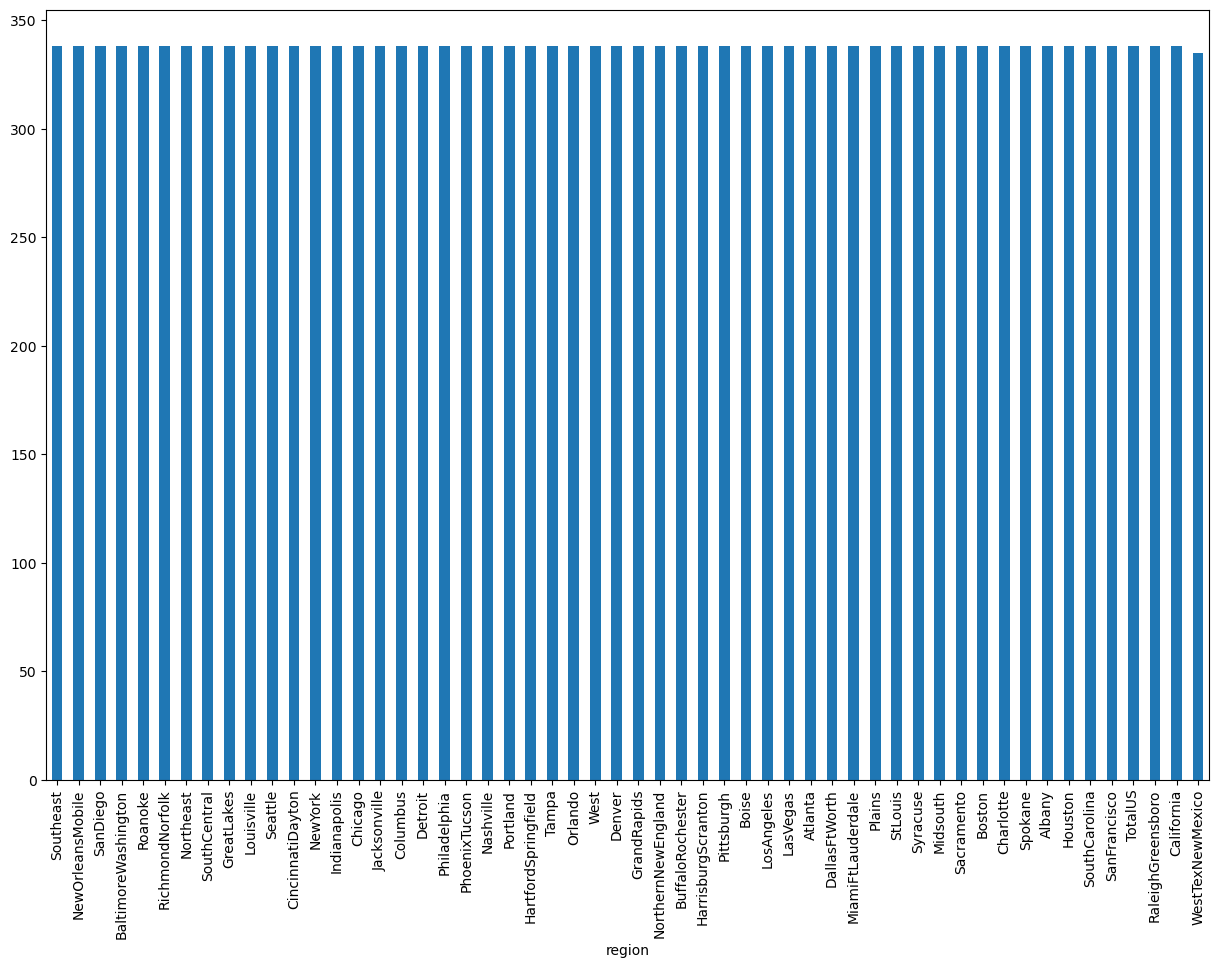

In [54]:
plt.figure(figsize=(15,10))
avocado_df['region'].value_counts().plot(kind = 'bar')

In [55]:
avocado_df.year.unique()

array([2015, 2016, 2017, 2018], dtype=int64)

<AxesSubplot:xlabel='year', ylabel='count'>

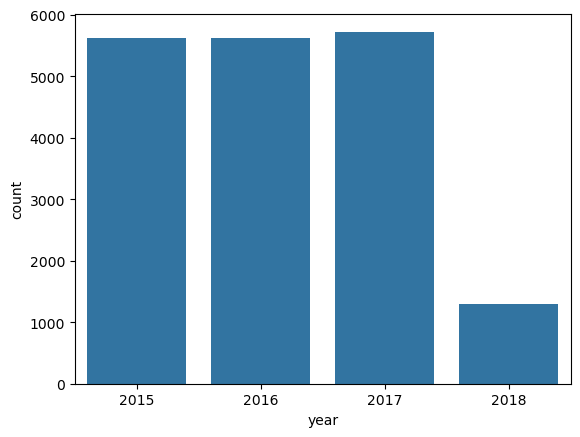

In [56]:
sns.countplot(x = 'year', data = avocado_df)

# Trend Analysis

In [57]:
avocado_df.head(2)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
9593,51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago


In [58]:
avocado_df.Date.unique()

array(['2015-01-04', '2015-01-11', '2015-01-18', '2015-01-25',
       '2015-02-01', '2015-02-08', '2015-02-15', '2015-02-22',
       '2015-03-01', '2015-03-08', '2015-03-15', '2015-03-22',
       '2015-03-29', '2015-04-05', '2015-04-12', '2015-04-19',
       '2015-04-26', '2015-05-03', '2015-05-10', '2015-05-17',
       '2015-05-24', '2015-05-31', '2015-06-07', '2015-06-14',
       '2015-06-21', '2015-06-28', '2015-07-05', '2015-07-12',
       '2015-07-19', '2015-07-26', '2015-08-02', '2015-08-09',
       '2015-08-16', '2015-08-23', '2015-08-30', '2015-09-06',
       '2015-09-13', '2015-09-20', '2015-09-27', '2015-10-04',
       '2015-10-11', '2015-10-18', '2015-10-25', '2015-11-01',
       '2015-11-08', '2015-11-15', '2015-11-22', '2015-11-29',
       '2015-12-06', '2015-12-13', '2015-12-20', '2015-12-27',
       '2016-01-03', '2016-01-10', '2016-01-17', '2016-01-24',
       '2016-01-31', '2016-02-07', '2016-02-14', '2016-02-21',
       '2016-02-28', '2016-03-06', '2016-03-13', '2016-

In [60]:
avocado_df.Date = pd.to_datetime(avocado_df['Date'])
avocado_df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
9593,51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
10009,51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
1819,51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
9333,51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise


In [61]:
avocado_df.set_index('Date', inplace=True)

<AxesSubplot:xlabel='Date'>

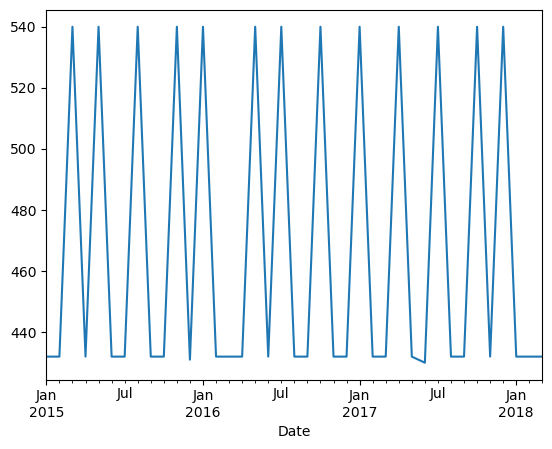

In [63]:
avocado_df.resample('M').size().plot()

In [66]:
avocado_trend = avocado_df.resample('M').size().reset_index().rename(columns={'Date':'ds', 0:'y'})
avocado_trend.head()

,ds,y
0,2015-01-31,432
1,2015-02-28,432
2,2015-03-31,540
3,2015-04-30,432
4,2015-05-31,540


In [67]:
fbp1 = Prophet()

In [68]:
fbp1.fit(avocado_trend)

18:09:50 - cmdstanpy - INFO - Chain [1] start processing
18:09:50 - cmdstanpy - INFO - Chain [1] done processing


In [69]:
future = fbp1.make_future_dataframe(periods=365)

In [70]:
forcast = fbp1.predict(future)
forcast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-31,470.526300,446.474487,527.514656,470.526300,470.526300,15.524187,15.524187,15.524187,15.524187,15.524187,15.524187,0.0,0.0,0.0,486.050487
1,2015-02-28,470.336911,385.111664,464.415227,470.336911,470.336911,-45.165381,-45.165381,-45.165381,-45.165381,-45.165381,-45.165381,0.0,0.0,0.0,425.171530
2,2015-03-31,470.127231,459.694243,544.531669,470.127231,470.127231,32.083500,32.083500,32.083500,32.083500,32.083500,32.083500,0.0,0.0,0.0,502.210731
3,2015-04-30,469.924314,409.467808,489.218060,469.924314,469.924314,-21.039739,-21.039739,-21.039739,-21.039739,-21.039739,-21.039739,0.0,0.0,0.0,448.884575
4,2015-05-31,469.714634,478.293697,559.255168,469.714634,469.714634,45.202751,45.202751,45.202751,45.202751,45.202751,45.202751,0.0,0.0,0.0,514.917385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,2019-03-27,460.272213,849.184436,933.446622,460.272206,460.272220,430.957800,430.957800,430.957800,430.957800,430.957800,430.957800,0.0,0.0,0.0,891.230013
400,2019-03-28,460.265449,757.721632,839.060285,460.265442,460.265456,337.879377,337.879377,337.879377,337.879377,337.879377,337.879377,0.0,0.0,0.0,798.144826
401,2019-03-29,460.258685,660.319957,741.611341,460.258678,460.258692,239.315336,239.315336,239.315336,239.315336,239.315336,239.315336,0.0,0.0,0.0,699.574021
402,2019-03-30,460.251921,555.474690,639.489717,460.251914,460.251928,136.835417,136.835417,136.835417,136.835417,136.835417,136.835417,0.0,0.0,0.0,597.087339


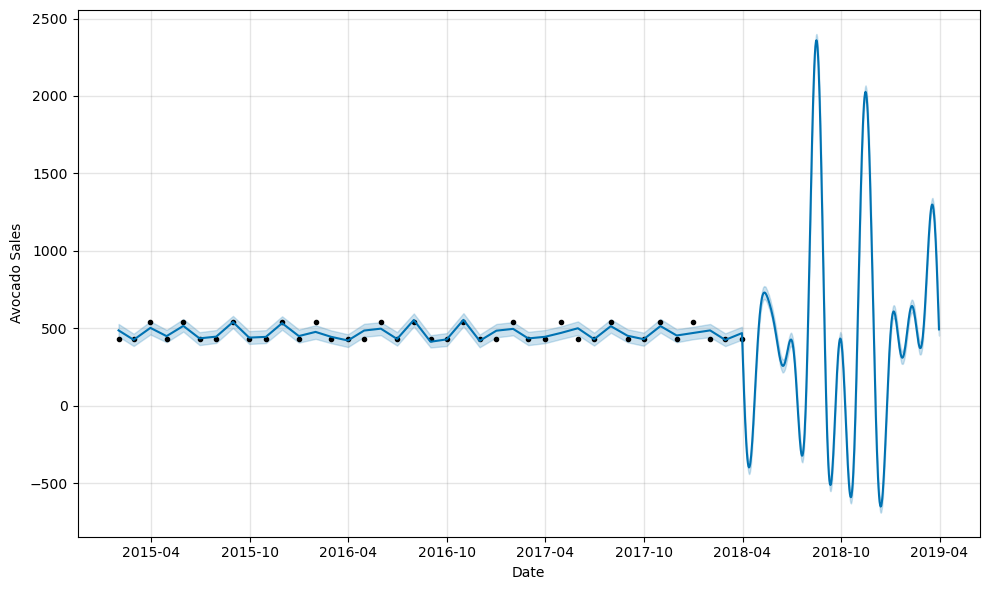

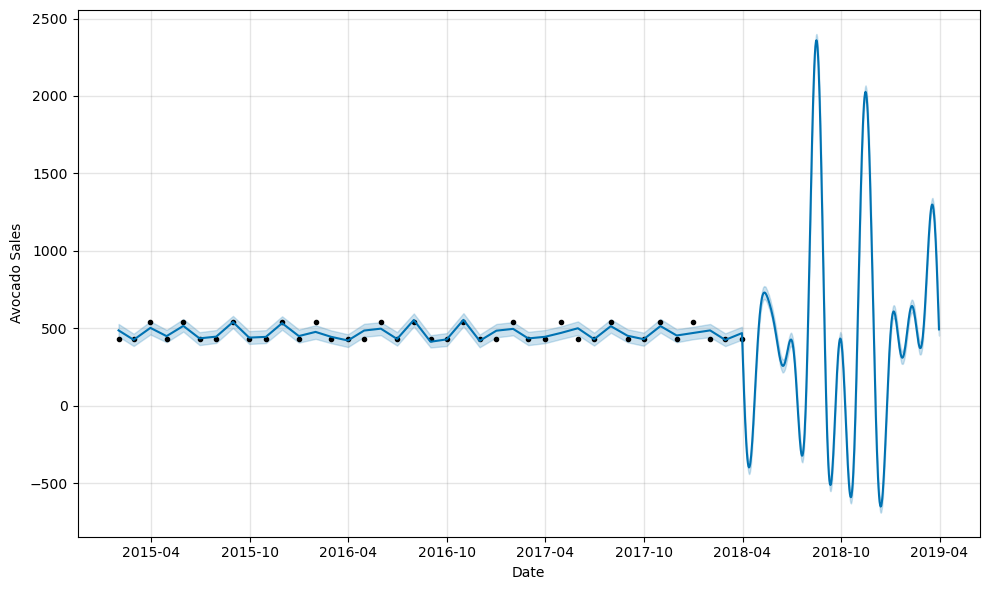

In [71]:
fbp1.plot(forcast, xlabel='Date', ylabel='Avocado Sales')

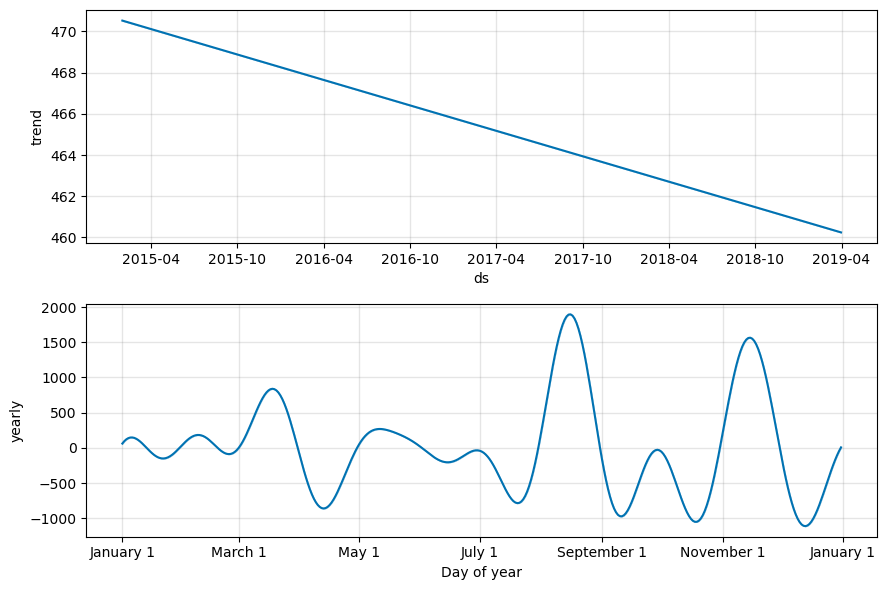

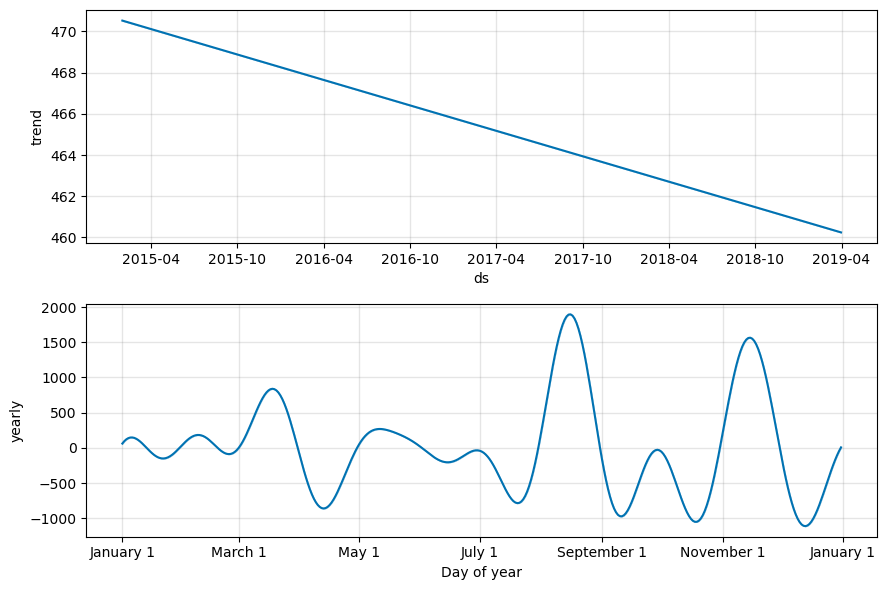

In [72]:
fbp1.plot_components(forcast)

In [77]:
avocado_prophet_df = avocado_df['AveragePrice'].reset_index().rename(columns={'Date':'ds', 'AveragePrice': 'y'})
avocado_prophet_df

,ds,y
0,2015-01-04,1.75
1,2015-01-04,1.49
2,2015-01-04,1.68
3,2015-01-04,1.52
4,2015-01-04,1.64
...,...,...
18244,2018-03-25,1.36
18245,2018-03-25,0.70
18246,2018-03-25,1.42
18247,2018-03-25,1.70


In [78]:
fbp2 = Prophet()
fbp2.fit(avocado_prophet_df)

19:47:14 - cmdstanpy - INFO - Chain [1] start processing
19:47:19 - cmdstanpy - INFO - Chain [1] done processing


In [79]:
future = fbp2.make_future_dataframe(periods=365)

In [80]:
forcast = fbp2.predict(future)
forcast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.497220,0.871177,1.849327,1.497220,1.497220,-0.112756,-0.112756,-0.112756,-0.112756,-0.112756,-0.112756,0.0,0.0,0.0,1.384464
1,2015-01-11,1.492220,0.895434,1.899269,1.492220,1.492220,-0.104283,-0.104283,-0.104283,-0.104283,-0.104283,-0.104283,0.0,0.0,0.0,1.387937
2,2015-01-18,1.487221,0.896099,1.867231,1.487221,1.487221,-0.103967,-0.103967,-0.103967,-0.103967,-0.103967,-0.103967,0.0,0.0,0.0,1.383254
3,2015-01-25,1.482221,0.855432,1.817734,1.482221,1.482221,-0.122958,-0.122958,-0.122958,-0.122958,-0.122958,-0.122958,0.0,0.0,0.0,1.359263
4,2015-02-01,1.477222,0.805969,1.794703,1.477222,1.477222,-0.151372,-0.151372,-0.151372,-0.151372,-0.151372,-0.151372,0.0,0.0,0.0,1.325850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,2019-03-21,1.159300,0.590538,1.594744,0.968328,1.333155,-0.086201,-0.086201,-0.086201,-0.086201,-0.086201,-0.086201,0.0,0.0,0.0,1.073099
530,2019-03-22,1.158564,0.575175,1.585187,0.966360,1.333324,-0.084544,-0.084544,-0.084544,-0.084544,-0.084544,-0.084544,0.0,0.0,0.0,1.074019
531,2019-03-23,1.157828,0.532256,1.613557,0.964392,1.333090,-0.082616,-0.082616,-0.082616,-0.082616,-0.082616,-0.082616,0.0,0.0,0.0,1.075212
532,2019-03-24,1.157092,0.553858,1.604577,0.962727,1.333446,-0.080435,-0.080435,-0.080435,-0.080435,-0.080435,-0.080435,0.0,0.0,0.0,1.076657


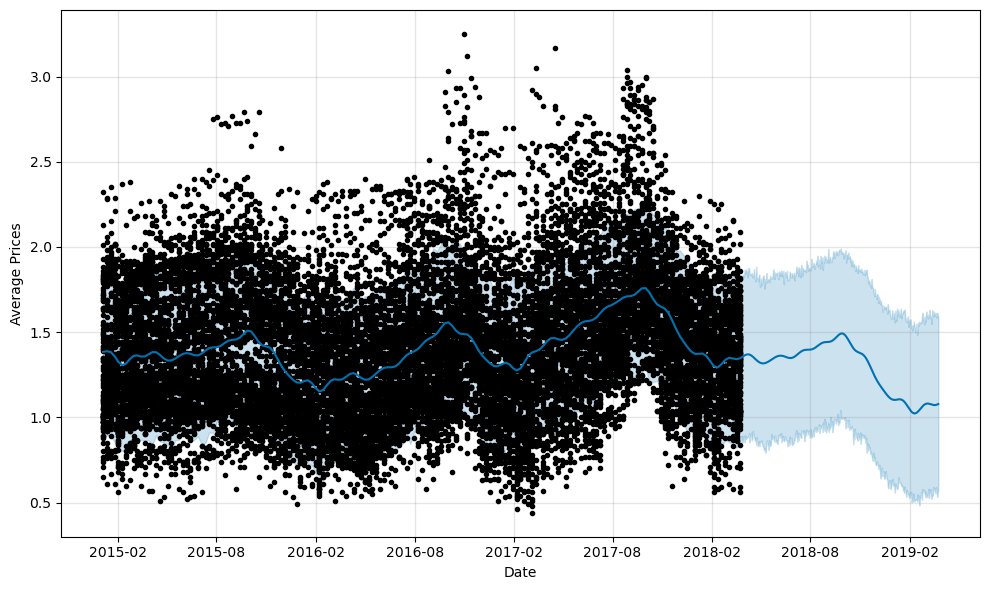

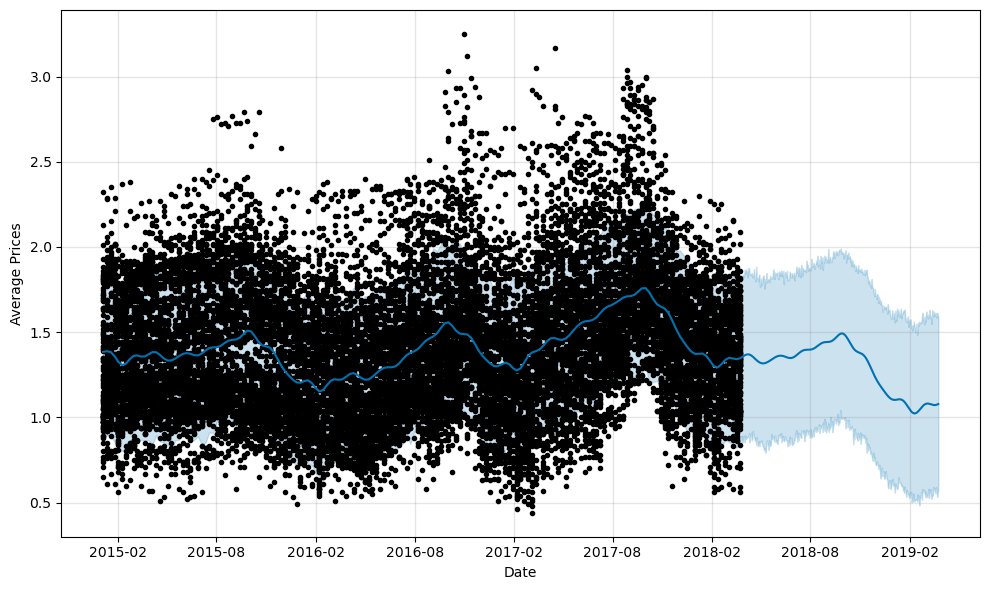

In [81]:
fbp2.plot(forcast, xlabel='Date', ylabel='Average Prices')

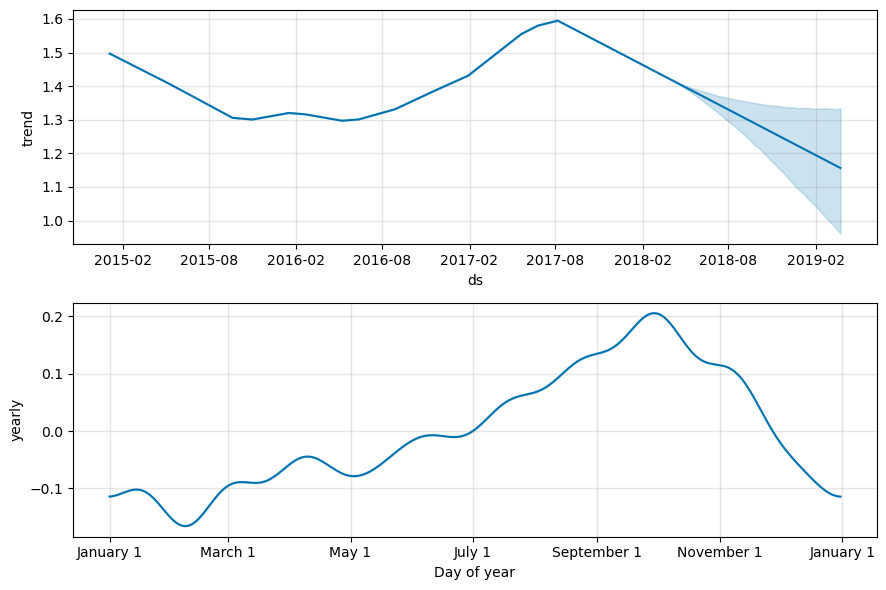

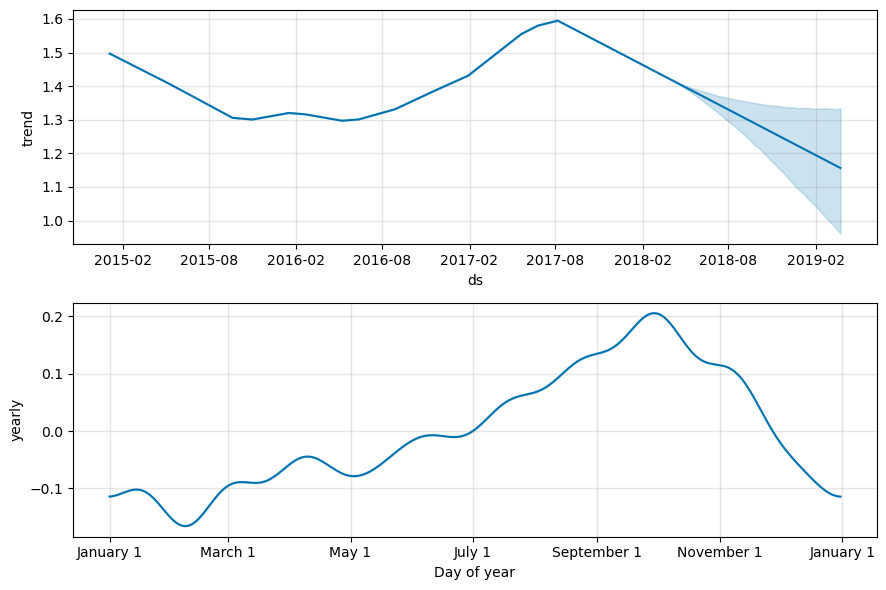

In [82]:
fbp2.plot_components(forcast)